## Spectral graph analysis - HPF

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from argparse import Namespace
from functools import reduce

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

def fft(yt):
    n = len(yt) # length of the signal
    k = np.arange(n)
    T = n/2
    frq = k/T # two sides frequency range
    frq = frq[range(n//2)] # one side frequency range
    # -------------
    FFTYT = np.fft.fft(yt)/n # fft computing and normalization
    FFTYT = FFTYT[range(n//2)]
    fftyt = abs(FFTYT)
    return frq, fftyt
    

# Synthetic data

## FEDFormer

In [3]:
pred_init = np.load('/pred_files/synthetic_data/high/FEDFormer/pred_-1.npy')
pred_0 = np.load('/pred_files/synthetic_data/high/FEDFormer/pred_0.npy')
pred_1 = np.load('/pred_files/synthetic_data/high/FEDFormer/pred_1.npy')
pred_2 = np.load('/pred_files/synthetic_data/high/FEDFormer/pred_2.npy')
pred_3 = np.load('/pred_files/synthetic_data/high/FEDFormer/pred_3.npy')
pred_4 = np.load('/pred_files/synthetic_data/high/FEDFormer/pred_4.npy')
pred_5 = np.load('/pred_files/synthetic_data/high/FEDFormer/pred_5.npy')
pred_6 = np.load('/pred_files/synthetic_data/high/FEDFormer/pred_6.npy')
pred_7 = np.load('/pred_files/synthetic_data/high/FEDFormer/pred_7.npy')
pred_8 = np.load('/pred_files/synthetic_data/high/FEDFormer/pred_8.npy')
pred_9 = np.load('/pred_files/synthetic_data/high/FEDFormer/pred_9.npy')
actual = np.load('/pred_files/synthetic_data/high/FEDFormer/true.npy')

### Visualization per epoch

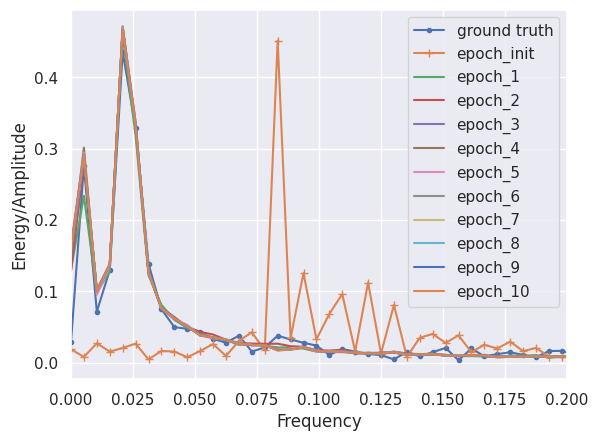

In [4]:
idx = 100
ts_init = pred_init[idx,:,0]
freq_init,energy_init = fft(ts_init)

ts0 = pred_0[idx,:,0]
freq0,energy0 = fft(ts0)

ts1 = pred_1[idx,:,0]
freq1,energy1 = fft(ts1)

ts2 = pred_2[idx,:,0]
freq2,energy2 = fft(ts2)

ts3 = pred_3[idx,:,0]
freq3,energy3 = fft(ts3)

ts4 = pred_4[idx,:,0]
freq4,energy4 = fft(ts4)

ts5 = pred_5[idx,:,0]
freq5,energy5 = fft(ts5)

ts6 = pred_6[idx,:,0]
freq6,energy6 = fft(ts6)

ts7 = pred_7[idx,:,0]
freq7,energy7 = fft(ts7)

ts8 = pred_8[idx,:,0]
freq8,energy8 = fft(ts8)

ts9 = pred_9[idx,:,0]
freq9,energy9 = fft(ts9)

ts_actual = actual[idx,:,0]
freq_actual,energy_actual = fft(ts_actual)

plt.plot(freq_actual,energy_actual, marker='.')
plt.plot(freq_init, energy_init, marker='+')
plt.plot(freq0,energy0)
plt.plot(freq1,energy1)
plt.plot(freq2,energy2)
plt.plot(freq3,energy3)
plt.plot(freq4,energy4)
plt.plot(freq5,energy5)
plt.plot(freq6,energy6)
plt.plot(freq7,energy7)
plt.plot(freq8,energy8)
plt.plot(freq9,energy9)

plt.legend(['ground truth', 'epoch_init', 'epoch_1', 'epoch_2', 'epoch_3', 'epoch_4', 'epoch_5', 'epoch_6', 'epoch_7', 'epoch_8', 'epoch_9', 'epoch_10'])

plt.xlim([0,0.2])
plt.xlabel('Frequency')
plt.ylabel('Energy/Amplitude')
plt.savefig('/results/synthetic_data/high/FEDFormer/spectral_graphs/spectrum_visualization_per_epoch.png')
plt.show()

## spectrum visualization: init, first, last

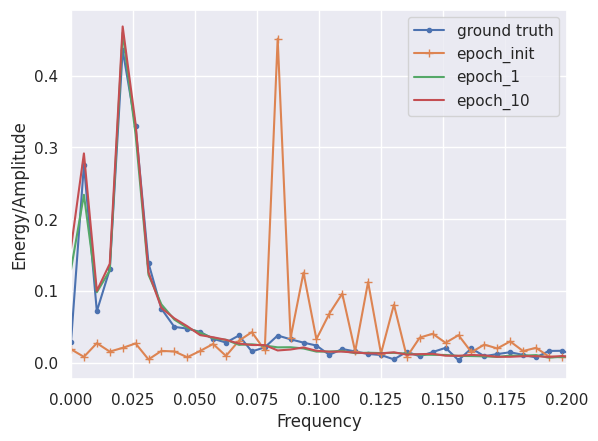

In [5]:
plt.plot(freq_actual,energy_actual, marker='.')
plt.plot(freq_init, energy_init, marker='+')
plt.plot(freq0,energy0)
plt.plot(freq9,energy9)

plt.legend(['ground truth', 'epoch_init', 'epoch_1','epoch_10'])

plt.xlim([0,0.2])

plt.xlabel('Frequency')
plt.ylabel('Energy/Amplitude')
plt.savefig('/results/synthetic_data/high/FEDFormer/spectral_graphs/spectrum_visualization_init_first_last.png')
plt.show()

### pred_spectrum / true_spectrum 

In [6]:
e_actual = np.zeros((192,))
e_init = np.zeros((192,))
e0 = np.zeros((192,))
e1 = np.zeros((192,))
e2 = np.zeros((192,))
e3 = np.zeros((192,))
e4 = np.zeros((192,))
e5 = np.zeros((192,))
e6 = np.zeros((192,))
e7 = np.zeros((192,))
e8 = np.zeros((192,))
e9 = np.zeros((192,))


for i in range(2496):
  idx = i
  ts_init = pred_init[idx,:,0]
  freq_init,energy_init = fft(ts_init)

  ts0 = pred_0[idx,:,0]
  freq0,energy0 = fft(ts0)

  ts1 = pred_1[idx,:,0]
  freq1,energy1 = fft(ts1)

  ts2 = pred_2[idx,:,0]
  freq2,energy2 = fft(ts2)

  ts3 = pred_3[idx,:,0]
  freq3,energy3 = fft(ts3)

  ts4 = pred_4[idx,:,0]
  freq4,energy4 = fft(ts4)

  ts5 = pred_5[idx,:,0]
  freq5,energy5 = fft(ts5)

  ts6 = pred_6[idx,:,0]
  freq6,energy6 = fft(ts6)

  ts7 = pred_7[idx,:,0]
  freq7,energy7 = fft(ts7)

  ts8 = pred_8[idx,:,0]
  freq8,energy8 = fft(ts8)

  ts9 = pred_9[idx,:,0]
  freq9,energy9 = fft(ts9)

  ts_actual = actual[idx,:,0]
  freq_actual,energy_actual = fft(ts_actual)
  
  e_actual += energy_actual
  e_init += energy_init
  e0 += energy0
  e1 += energy1
  e2 += energy2
  e3 += energy3
  e4 += energy4
  e5 += energy5
  e6 += energy6
  e7 += energy7
  e8 += energy8
  e9 += energy9

energy_init = e_init / 2496
energy_actual = e_actual / 2496
energy0 = e0 / 2496
energy1 = e1 / 2496
energy2 = e2 / 2496
energy3 = e3 / 2496
energy4 = e4 / 2496
energy5 = e5 / 2496
energy6 = e6 / 2496
energy7 = e7 / 2496
energy8 = e8 / 2496
energy9 = e9 / 2496

In [7]:
fed_dict = {'frequency':freq_actual, 'pred_actual_energy':energy_actual, 'pred_init_energy':energy_init,'pred0_energy':energy0, 'pred1_energy':energy1, 'pred2_energy':energy2,'pred3_energy':energy3, 'pred4_energy':energy4, 'pred5_energy':energy5, 'pred6_energy':energy6, 'pred7_energy':energy7, 'pred8_energy':energy8, 'pred9_energy':energy9}

df_fed =  pd.DataFrame(fed_dict)
df_fed

,frequency,pred_actual_energy,pred_init_energy,pred0_energy,pred1_energy,pred2_energy,pred3_energy,pred4_energy,pred5_energy,pred6_energy,pred7_energy,pred8_energy,pred9_energy
0,0.000000,0.061228,0.134759,0.102680,0.107132,0.097860,0.096228,0.094610,0.097920,0.095625,0.095264,0.095565,0.095704
1,0.005208,0.309903,0.010994,0.215529,0.255384,0.259727,0.256771,0.257589,0.259141,0.259316,0.258469,0.258423,0.258392
2,0.010417,0.086315,0.019469,0.082632,0.082715,0.084916,0.084315,0.084099,0.084131,0.084161,0.083788,0.083821,0.083875
3,0.015625,0.135217,0.011727,0.133396,0.134067,0.135834,0.135258,0.135525,0.135108,0.135263,0.134882,0.134997,0.135047
4,0.020833,0.460022,0.016018,0.458900,0.457140,0.460243,0.458927,0.459449,0.459136,0.459361,0.458852,0.458726,0.458806
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,0.973958,0.006666,0.002138,0.001845,0.002088,0.002034,0.002046,0.001995,0.002026,0.002025,0.002023,0.002025,0.002027
188,0.979167,0.006456,0.002220,0.002172,0.002135,0.001949,0.001999,0.001968,0.002021,0.002019,0.002015,0.002017,0.002021
189,0.984375,0.005683,0.002483,0.002144,0.002111,0.002097,0.002048,0.002042,0.002074,0.002069,0.002067,0.002069,0.002069
190,0.989583,0.008459,0.002542,0.001935,0.002053,0.001981,0.002019,0.001997,0.002047,0.002039,0.002038,0.002039,0.002042


In [8]:
x = df_fed.iloc[1:2, :]
y = df_fed.iloc[4:5, :]
sub_df_fed = pd.concat([x, y])
sub_df_fed

,frequency,pred_actual_energy,pred_init_energy,pred0_energy,pred1_energy,pred2_energy,pred3_energy,pred4_energy,pred5_energy,pred6_energy,pred7_energy,pred8_energy,pred9_energy
1,0.005208,0.309903,0.010994,0.215529,0.255384,0.259727,0.256771,0.257589,0.259141,0.259316,0.258469,0.258423,0.258392
4,0.020833,0.460022,0.016018,0.458900,0.457140,0.460243,0.458927,0.459449,0.459136,0.459361,0.458852,0.458726,0.458806


In [9]:
def fed_ratio(df):
  new_df = pd.DataFrame()
  new_df['frequency'] = df['frequency']
  new_df['epoch_init_ratio'] = df['pred_init_energy'] / df['pred_actual_energy']
  for i in (range(10)):
    new_df[f'epoch_{i}_ratio'] = df[f'pred{i}_energy'] / df['pred_actual_energy']

  return new_df

In [10]:
fed_ratios = fed_ratio(sub_df_fed)
fed_ratios = fed_ratios.drop('frequency', axis=1)
fed_ratios

,epoch_init_ratio,epoch_0_ratio,epoch_1_ratio,epoch_2_ratio,epoch_3_ratio,epoch_4_ratio,epoch_5_ratio,epoch_6_ratio,epoch_7_ratio,epoch_8_ratio,epoch_9_ratio
1,0.035474,0.695473,0.824078,0.838091,0.828552,0.831193,0.836200,0.836767,0.834033,0.833883,0.833785
4,0.034819,0.997562,0.993737,1.000482,0.997621,0.998754,0.998074,0.998565,0.997457,0.997183,0.997357


In [11]:
low = fed_ratios.iloc[0, :]
high = fed_ratios.iloc[-1, :]

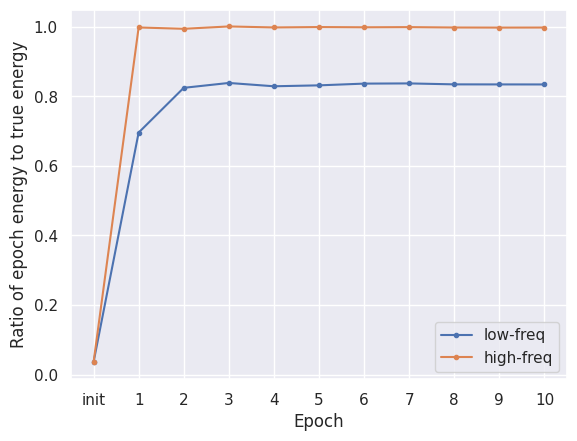

In [12]:
plt.plot(low, marker='.')
plt.plot(high, marker='.')
plt.ylabel('Ratio of epoch energy to true energy')
plt.xlabel('Epoch')
plt.xticks(fed_ratios.columns ,labels = ['init', '1', '2', '3', '4', '5', '6', '7', '8', '9','10'])
plt.legend(['low-freq', 'high-freq'])
plt.savefig('/results/synthetic_data/high/FEDFormer/spectral_graphs/spectrum_ratio.png')
plt.show()

## AutoFormer

In [13]:
pred_init = np.load('/pred_files/synthetic_data/high/Autoformer/pred_-1.npy')
pred_0 = np.load('/pred_files/synthetic_data/high/Autoformer/pred_0.npy')
pred_1 = np.load('/pred_files/synthetic_data/high/Autoformer/pred_1.npy')
pred_2 = np.load('/pred_files/synthetic_data/high/Autoformer/pred_2.npy')
pred_3 = np.load('/pred_files/synthetic_data/high/Autoformer/pred_3.npy')
actual = np.load('/pred_files/synthetic_data/high/Autoformer/true.npy')

### Visualization per epoch

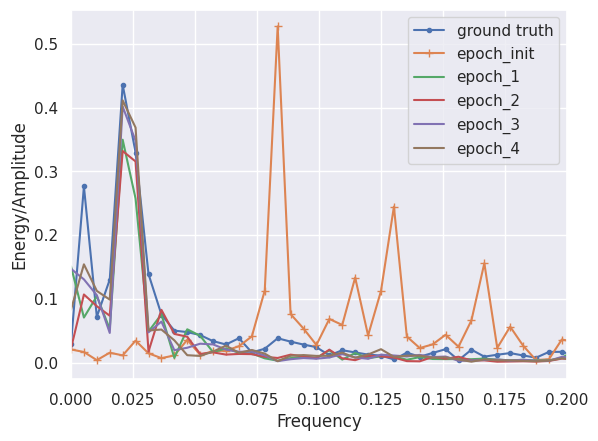

In [14]:
idx = 100
ts_init = pred_init[idx,:,0]
freq_init,energy_init = fft(ts_init)

ts0 = pred_0[idx,:,0]
freq0,energy0 = fft(ts0)

ts1 = pred_1[idx,:,0]
freq1,energy1 = fft(ts1)

ts2 = pred_2[idx,:,0]
freq2,energy2 = fft(ts2)

ts3 = pred_3[idx,:,0]
freq3,energy3 = fft(ts3)

ts_actual = actual[idx,:,0]
freq_actual,energy_actual = fft(ts_actual)

plt.plot(freq_actual,energy_actual, marker='.')
plt.plot(freq_init, energy_init, marker='+')
plt.plot(freq0,energy0)
plt.plot(freq1,energy1)
plt.plot(freq2,energy2)
plt.plot(freq3,energy3)

plt.legend(['ground truth', 'epoch_init', 'epoch_1', 'epoch_2', 'epoch_3', 'epoch_4'])

plt.xlim([0,0.2])
plt.xlabel('Frequency')
plt.ylabel('Energy/Amplitude')
plt.savefig('/results/synthetic_data/high/Autoformer/spectral_graphs/spectrum_visualization_per_epoch.png')
plt.show()

### spectrum visualization: init, first, last

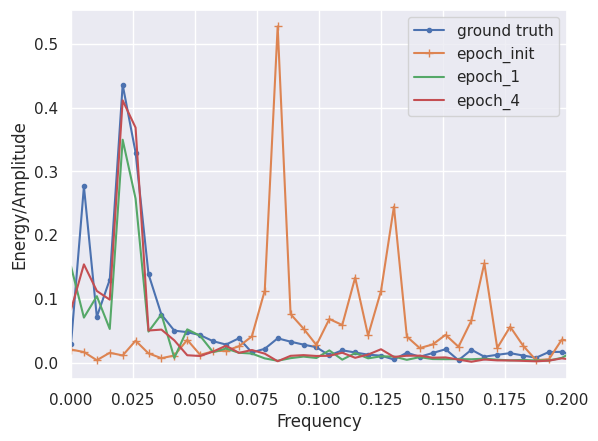

In [15]:
plt.plot(freq_actual,energy_actual, marker='.')
plt.plot(freq_init, energy_init, marker='+')
plt.plot(freq0,energy0)
plt.plot(freq3,energy3)

plt.legend(['ground truth', 'epoch_init', 'epoch_1','epoch_4'])

plt.xlim([0,0.2])
plt.xlabel('Frequency')
plt.ylabel('Energy/Amplitude')
plt.savefig('/results/synthetic_data/high/Autoformer/spectral_graphs/spectrum_visualization_init_first_last.png')
plt.show()

### pred_spectrum / true_spectrum 

In [16]:
e_actual = np.zeros((192,))
e_init = np.zeros((192,))
e0 = np.zeros((192,))
e1 = np.zeros((192,))
e2 = np.zeros((192,))
e3 = np.zeros((192,))

for i in range(2496):
  idx = i
  ts_init = pred_init[idx,:,0]
  freq_init,energy_init = fft(ts_init)

  ts0 = pred_0[idx,:,0]
  freq0,energy0 = fft(ts0)

  ts1 = pred_1[idx,:,0]
  freq1,energy1 = fft(ts1)

  ts2 = pred_2[idx,:,0]
  freq2,energy2 = fft(ts2)

  ts3 = pred_3[idx,:,0]
  freq3,energy3 = fft(ts3)

  ts_actual = actual[idx,:,0]
  freq_actual,energy_actual = fft(ts_actual)
  
  e_actual += energy_actual
  e_init += energy_init
  e0 += energy0
  e1 += energy1
  e2 += energy2
  e3 += energy3

energy_init = e_init / 2496
energy_actual = e_actual / 2496
energy0 = e0 / 2496
energy1 = e1 / 2496
energy2 = e2 / 2496
energy3 = e3 / 2496

In [17]:
auto_dict = {'frequency':freq_actual, 'pred_actual_energy':energy_actual, 'pred_init_energy':energy_init, 'pred0_energy':energy0, 'pred1_energy':energy1, 'pred2_energy':energy2,'pred3_energy':energy3}
df_auto =  pd.DataFrame(auto_dict)
df_auto

,frequency,pred_actual_energy,pred_init_energy,pred0_energy,pred1_energy,pred2_energy,pred3_energy
0,0.000000,0.061228,0.135253,0.151563,0.133646,0.138580,0.128053
1,0.005208,0.309903,0.019058,0.060311,0.063723,0.081455,0.082280
2,0.010417,0.086315,0.018383,0.093456,0.098848,0.112974,0.113462
3,0.015625,0.135217,0.015637,0.061881,0.049638,0.054057,0.061218
4,0.020833,0.460022,0.017120,0.383153,0.377957,0.412212,0.414167
...,...,...,...,...,...,...,...
187,0.973958,0.006666,0.006770,0.002090,0.002010,0.001969,0.002163
188,0.979167,0.006456,0.007158,0.001917,0.001882,0.001848,0.001858
189,0.984375,0.005683,0.006788,0.001976,0.002026,0.002346,0.002456
190,0.989583,0.008459,0.007286,0.001853,0.002087,0.001918,0.001973


In [18]:
x = df_auto.iloc[1:2, :]
y = df_auto.iloc[4:5, :]
sub_df_auto = pd.concat([x, y])
sub_df_auto

,frequency,pred_actual_energy,pred_init_energy,pred0_energy,pred1_energy,pred2_energy,pred3_energy
1,0.005208,0.309903,0.019058,0.060311,0.063723,0.081455,0.082280
4,0.020833,0.460022,0.017120,0.383153,0.377957,0.412212,0.414167


In [19]:
def auto_ratio(df):
  new_df = pd.DataFrame()
  new_df['frequency'] = df['frequency']
  new_df['epoch_init_ratio'] = df['pred_init_energy'] / df['pred_actual_energy']
  for i in (range(4)):
    new_df[f'epoch_{i}_ratio'] = df[f'pred{i}_energy'] / df['pred_actual_energy']
  return new_df

In [20]:
auto_ratios = auto_ratio(sub_df_auto)
auto_ratios = auto_ratios.drop('frequency', axis=1)
auto_ratios

,epoch_init_ratio,epoch_0_ratio,epoch_1_ratio,epoch_2_ratio,epoch_3_ratio
1,0.061498,0.194614,0.205622,0.262839,0.265504
4,0.037216,0.832902,0.821607,0.896072,0.900321


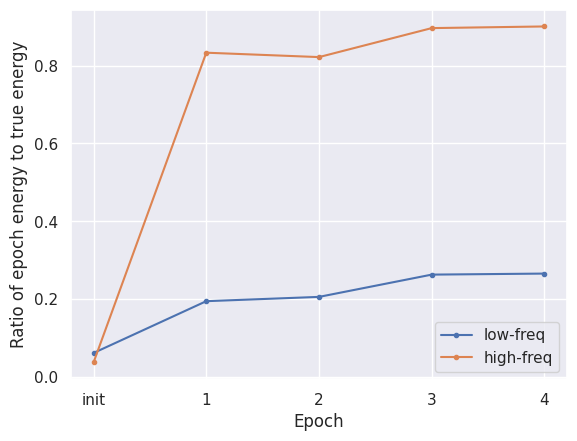

In [21]:
low = auto_ratios.iloc[0, :]
high = auto_ratios.iloc[-1, :]

plt.plot(low, marker='.')
plt.plot(high, marker='.')
plt.ylabel('Ratio of epoch energy to true energy')
plt.xlabel('Epoch')
plt.xticks(auto_ratios.columns ,labels = ['init', '1', '2', '3', '4'])#, '5', '6', '7', '8', '9'])
plt.legend(['low-freq', 'high-freq'])
plt.savefig('/results/synthetic_data/high/Autoformer/spectral_graphs/spectrum_ratio.png')
plt.show()

### InFormer

In [22]:
pred_init = np.load('/pred_files/synthetic_data/high/Informer/pred_-1.npy')
pred_0 = np.load('/pred_files/synthetic_data/high/Informer/pred_0.npy')
pred_1 = np.load('/pred_files/synthetic_data/high/Informer/pred_1.npy')
pred_2 = np.load('/pred_files/synthetic_data/high/Informer/pred_2.npy')
pred_3 = np.load('/pred_files/synthetic_data/high/Informer/pred_3.npy')
pred_4 = np.load('/pred_files/synthetic_data/high/Informer/pred_4.npy')
pred_5 = np.load('/pred_files/synthetic_data/high/Informer/pred_5.npy')
pred_6 = np.load('/pred_files/synthetic_data/high/Informer/pred_6.npy')
pred_7 = np.load('/pred_files/synthetic_data/high/Informer/pred_7.npy')
pred_8 = np.load('/pred_files/synthetic_data/high/Informer/pred_8.npy')
pred_9 = np.load('/pred_files/synthetic_data/high/Informer/pred_9.npy')
actual = np.load('/pred_files/synthetic_data/high/Informer/true.npy')

### Visualization per epoch

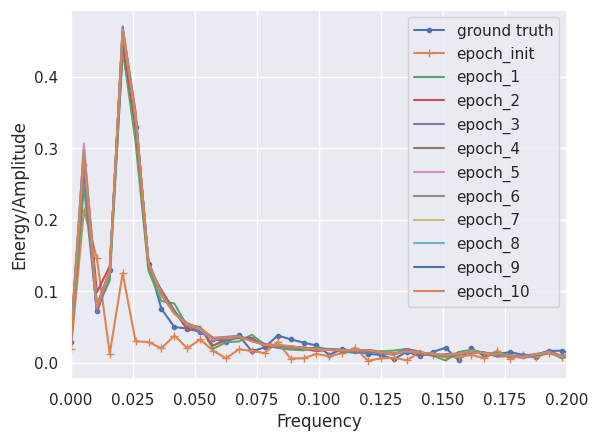

In [23]:
idx = 100
ts_init = pred_init[idx,:,0]
freq_init,energy_init = fft(ts_init)

ts0 = pred_0[idx,:,0]
freq0,energy0 = fft(ts0)

ts1 = pred_1[idx,:,0]
freq1,energy1 = fft(ts1)

ts2 = pred_2[idx,:,0]
freq2,energy2 = fft(ts2)

ts3 = pred_3[idx,:,0]
freq3,energy3 = fft(ts3)

ts4 = pred_4[idx,:,0]
freq4,energy4 = fft(ts4)

ts5 = pred_5[idx,:,0]
freq5,energy5 = fft(ts5)

ts6 = pred_6[idx,:,0]
freq6,energy6 = fft(ts6)

ts7 = pred_7[idx,:,0]
freq7,energy7 = fft(ts7)

ts8 = pred_8[idx,:,0]
freq8,energy8 = fft(ts8)

ts9 = pred_9[idx,:,0]
freq9,energy9 = fft(ts9)

ts_actual = actual[idx,:,0]
freq_actual,energy_actual = fft(ts_actual)

plt.plot(freq_actual,energy_actual, marker='.')
plt.plot(freq_init, energy_init, marker='+')
plt.plot(freq0,energy0)
plt.plot(freq1,energy1)
plt.plot(freq2,energy2)
plt.plot(freq3,energy3)
plt.plot(freq4,energy4)
plt.plot(freq5,energy5)
plt.plot(freq6,energy6)
plt.plot(freq7,energy7)
plt.plot(freq8,energy8)
plt.plot(freq9,energy9)

plt.legend(['ground truth', 'epoch_init', 'epoch_1', 'epoch_2', 'epoch_3', 'epoch_4', 'epoch_5', 'epoch_6', 'epoch_7', 'epoch_8', 'epoch_9', 'epoch_10'])

plt.xlim([0,0.2])
plt.xlabel('Frequency')
plt.ylabel('Energy/Amplitude')
plt.savefig('/results/synthetic_data/high/Informer/spectral_graphs/spectrum_visualization_per_epoch.png')
plt.show()

### spectrum visualization: init, first, last

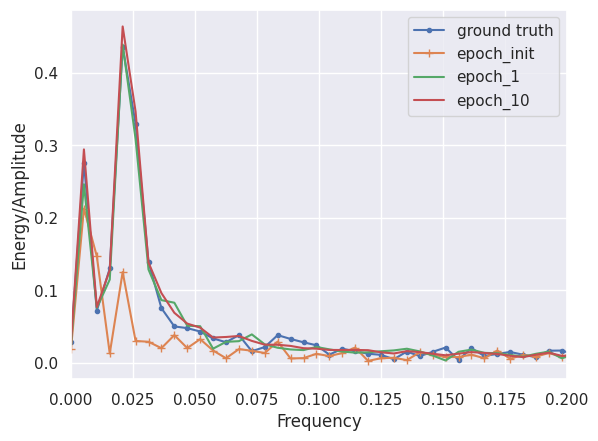

In [24]:
plt.plot(freq_actual,energy_actual, marker='.')
plt.plot(freq_init, energy_init, marker='+')
plt.plot(freq0,energy0)
plt.plot(freq9,energy9)

plt.legend(['ground truth', 'epoch_init', 'epoch_1','epoch_10'])

plt.xlim([0,0.2])
plt.xlabel('Frequency')
plt.ylabel('Energy/Amplitude')
plt.savefig('/results/synthetic_data/high/Informer/spectral_graphs/spectrum_visualization_init_first_last.png')
plt.show()

### pred_spectrum / true_spectrum 

In [25]:
e_actual = np.zeros((192,))
e_init = np.zeros((192,))
e0 = np.zeros((192,))
e1 = np.zeros((192,))
e2 = np.zeros((192,))
e3 = np.zeros((192,))
e4 = np.zeros((192,))
e5 = np.zeros((192,))
e6 = np.zeros((192,))
e7 = np.zeros((192,))
e8 = np.zeros((192,))
e9 = np.zeros((192,))


for i in range(2496):
  idx = i
  ts_init = pred_init[idx,:,0]
  freq_init,energy_init = fft(ts_init)

  ts0 = pred_0[idx,:,0]
  freq0,energy0 = fft(ts0)

  ts1 = pred_1[idx,:,0]
  freq1,energy1 = fft(ts1)

  ts2 = pred_2[idx,:,0]
  freq2,energy2 = fft(ts2)

  ts3 = pred_3[idx,:,0]
  freq3,energy3 = fft(ts3)

  ts4 = pred_4[idx,:,0]
  freq4,energy4 = fft(ts4)

  ts5 = pred_5[idx,:,0]
  freq5,energy5 = fft(ts5)

  ts6 = pred_6[idx,:,0]
  freq6,energy6 = fft(ts6)

  ts7 = pred_7[idx,:,0]
  freq7,energy7 = fft(ts7)

  ts8 = pred_8[idx,:,0]
  freq8,energy8 = fft(ts8)

  ts9 = pred_9[idx,:,0]
  freq9,energy9 = fft(ts9)

  ts_actual = actual[idx,:,0]
  freq_actual,energy_actual = fft(ts_actual)
  
  e_actual += energy_actual
  e_init += energy_init
  e0 += energy0
  e1 += energy1
  e2 += energy2
  e3 += energy3
  e4 += energy4
  e5 += energy5
  e6 += energy6
  e7 += energy7
  e8 += energy8
  e9 += energy9

energy_init = e_init / 2496
energy_actual = e_actual / 2496
energy0 = e0 / 2496
energy1 = e1 / 2496
energy2 = e2 / 2496
energy3 = e3 / 2496
energy4 = e4 / 2496
energy5 = e5 / 2496
energy6 = e6 / 2496
energy7 = e7 / 2496
energy8 = e8 / 2496
energy9 = e9 / 2496

In [26]:
inf_dict = {'frequency':freq_actual, 'pred_actual_energy':energy_actual, 'pred_init_energy':energy_init,'pred0_energy':energy0, 'pred1_energy':energy1, 'pred2_energy':energy2,'pred3_energy':energy3, 'pred4_energy':energy4, 'pred5_energy':energy5, 'pred6_energy':energy6, 'pred7_energy':energy7, 'pred8_energy':energy8, 'pred9_energy':energy9}

df_inf =  pd.DataFrame(inf_dict)
df_inf

,frequency,pred_actual_energy,pred_init_energy,pred0_energy,pred1_energy,pred2_energy,pred3_energy,pred4_energy,pred5_energy,pred6_energy,pred7_energy,pred8_energy,pred9_energy
0,0.000000,0.061228,0.169088,0.063910,0.063615,0.070557,0.063920,0.060415,0.062652,0.063218,0.062446,0.062502,0.062283
1,0.005208,0.309903,0.187973,0.307966,0.309243,0.313936,0.316301,0.317971,0.318869,0.319264,0.318680,0.317686,0.318387
2,0.010417,0.086315,0.168022,0.081650,0.093975,0.089038,0.087795,0.088512,0.089274,0.088465,0.088383,0.088888,0.088615
3,0.015625,0.135217,0.063545,0.138496,0.144801,0.141007,0.139674,0.139004,0.140544,0.140055,0.140390,0.140382,0.140586
4,0.020833,0.460022,0.114040,0.468692,0.485145,0.480020,0.478900,0.476455,0.477234,0.477296,0.477006,0.477092,0.477227
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,0.973958,0.006666,0.003786,0.003507,0.002890,0.002757,0.002591,0.002554,0.002486,0.002526,0.002489,0.002556,0.002515
188,0.979167,0.006456,0.004844,0.002723,0.002167,0.002158,0.002164,0.002153,0.002108,0.002121,0.002149,0.002125,0.002128
189,0.984375,0.005683,0.004147,0.002739,0.002273,0.002135,0.002260,0.002221,0.002224,0.002230,0.002184,0.002172,0.002169
190,0.989583,0.008459,0.004525,0.002697,0.002175,0.002140,0.002183,0.002127,0.002070,0.002102,0.002074,0.002067,0.002072


In [27]:
x = df_inf.iloc[1:2, :]
y = df_inf.iloc[4:5, :]
sub_df_inf = pd.concat([x, y])
sub_df_inf

,frequency,pred_actual_energy,pred_init_energy,pred0_energy,pred1_energy,pred2_energy,pred3_energy,pred4_energy,pred5_energy,pred6_energy,pred7_energy,pred8_energy,pred9_energy
1,0.005208,0.309903,0.187973,0.307966,0.309243,0.313936,0.316301,0.317971,0.318869,0.319264,0.318680,0.317686,0.318387
4,0.020833,0.460022,0.114040,0.468692,0.485145,0.480020,0.478900,0.476455,0.477234,0.477296,0.477006,0.477092,0.477227


In [28]:
def inf_ratio(df):
  new_df = pd.DataFrame()
  new_df['frequency'] = df['frequency']
  new_df['epoch_init_ratio'] = df['pred_init_energy'] / df['pred_actual_energy']
  for i in (range(10)):
    new_df[f'epoch_{i}_ratio'] = df[f'pred{i}_energy'] / df['pred_actual_energy']
  return new_df

In [29]:
inf_ratios = inf_ratio(sub_df_inf)
inf_ratios = inf_ratios.drop('frequency', axis=1)
inf_ratios

,epoch_init_ratio,epoch_0_ratio,epoch_1_ratio,epoch_2_ratio,epoch_3_ratio,epoch_4_ratio,epoch_5_ratio,epoch_6_ratio,epoch_7_ratio,epoch_8_ratio,epoch_9_ratio
1,0.606554,0.993752,0.997872,1.013015,1.020647,1.026036,1.028934,1.030208,1.028323,1.025115,1.027378
4,0.247902,1.018848,1.054614,1.043473,1.041038,1.035724,1.037417,1.037552,1.036920,1.037108,1.037401


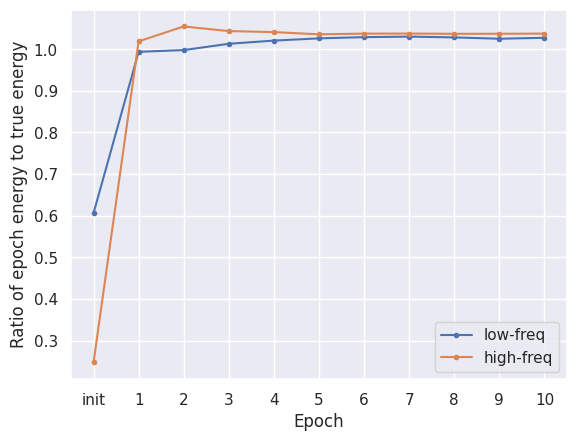

In [30]:
low = inf_ratios.iloc[0, :]
high = inf_ratios.iloc[-1, :]

plt.plot(low, marker='.')
plt.plot(high, marker='.')
plt.ylabel('Ratio of epoch energy to true energy')
plt.xlabel('Epoch')
plt.xticks(inf_ratios.columns ,labels = ['init', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
plt.legend(['low-freq', 'high-freq'])
plt.savefig('/results/synthetic_data/high/Informer/spectral_graphs/spectrum_ratio.png')
plt.show()